In [1]:
from src.utils.results_utils import *

from src.utils.data_utils import str_dict_to_values

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
df_char_cleaned = pd.read_csv('data/cleaned.csv')

df_char_cleaned['Languages'] = df_char_cleaned['Languages'].apply(str_dict_to_values)
df_char_cleaned['Country'] = df_char_cleaned['Country'].apply(str_dict_to_values)
df_char_cleaned['Genres'] = df_char_cleaned['Genres'].apply(str_dict_to_values)

## Loading the cleaned and conditionned dataset 

In [3]:
df_char_cleaned = pd.read_csv('data/cleaned.csv')

df_char_cleaned['Languages'] = df_char_cleaned['Languages'].apply(str_dict_to_values)
df_char_cleaned['Country'] = df_char_cleaned['Country'].apply(str_dict_to_values)
df_char_cleaned['Genres'] = df_char_cleaned['Genres'].apply(str_dict_to_values)

df_char_cleaned.head()

,Wikipedia_ID,Name,Languages,Country,Genres,Character_name,Sex,Actor_age
27822,5579814,Bad Company,[English Language],[United States of America],"[Crime Fiction, Thriller, Psychological thrill...",Margaret,F,40.0
53033,5439220,AVPR: Aliens vs Predator - Requiem,[English Language],[United States of America],"[Thriller, Monster movie, Science Fiction, Hor...",Curtis,NaN,NaN
18929,22208692,Quacker Tracker,[English Language],[United States of America],"[Short Film, Family Film, Animation]",Gonzales,M,58.0
12473,35641836,2 Days in New York,"[French Language, Italian Language, English La...","[France, United States of America, Germany, Be...","[Romance Film, Comedy film]",Robinson,F,NaN
80633,7511807,Kammaren,[Swedish Language],[Sweden],"[Horror, Drama]",Sonia,F,79.0


Ajouter une partie ou on présente notre dataset 

In [4]:
name_counts = df_char_cleaned['Character_name'].value_counts()
top_100_names = name_counts.head(1000)

# Creating the interactive line plot with hover information
fig = go.Figure()

# Adding trace for the line plot with hover text
fig.add_trace(go.Scatter(
    x=top_100_names.index,
    y=top_100_names.values,
    mode='lines+markers',
    name='Character Count',
    line=dict(color='skyblue'),
    hovertext=[f"Name: {name}<br>Count: {count}" for name, count in zip(top_100_names.index, top_100_names.values)],
    hoverinfo="text"
))

# Setting up layout for the figure
fig.update_layout(
    title='Count of Most Popular Character Names',
    xaxis_title='Character Name',
    yaxis_title='Count',
    xaxis=dict(tickangle=45)
)

fig.show()

## Movie Genre Analysis

In [5]:
#Let's make a list of the genres we are interested in and assign one of them to each character
genres_list = ['Action & Adventure', 'Drama', 'Comedy', 'Horror & Thriller', 
              'Fantasy & Sci-Fi', 'Historical & War', 'Romance', 'Documentary', 
              'Music & Performance', 'Cult & B-Movies', 'Other']
df_char_cleaned['Genre_Category'] = df_char_cleaned['Genres'].apply(lambda x: categorize_genre(x))

In [ ]:
#Let's see the most frequent names in each genre and for each gender
frequent_names_m, frequent_names_f = get_top_names_by_genre(df_char_cleaned)

In [30]:
data_f = create_sunburst_data(frequent_names_f)
data_m = create_sunburst_data(frequent_names_m)

In [ ]:
frequent_names_f.head(5)

In [ ]:
#Now, let's see the number of appearences of each name in our dataset, and in which genres they appear
genre_counts_result, movies_with_name = count_name_appearance_by_genre(df_char_cleaned, genres_list, 'Leo')
genre_counts_result.head(15)

,Action & Adventure,Drama,Comedy,Horror & Thriller,Fantasy & Sci-Fi,Historical & War,Romance,Documentary,Music & Performance,Cult & B-Movies,Other
0,57,75,46,39,16,14,27,5,4,18,1


In [ ]:
movies_with_name.head(5)

,Wikipedia_ID,Name,Languages,Country,Genres,Character_name,Sex,Actor_age,Genre_Category
466,21271533,Bleeder,[Danish Language],[Denmark],"[Thriller, Drama]",Leo,M,34.0,"[Action & Adventure, Horror & Thriller, Drama]"
487,17379289,Without Warning,[English Language],[United States of America],"[Science Fiction, Horror]",Leo,M,60.0,"[Fantasy & Sci-Fi, Horror & Thriller]"
2026,13934307,Mammoth,"[Tagalog language, English Language, Thai Lang...","[Denmark, Sweden, Germany]","[Drama, Indie, World cinema]",Leo,M,30.0,"[Drama, Cult & B-Movies]"
5098,277710,Heartbreakers,"[Russian Language, English Language]",[United States of America],"[Crime Fiction, Romantic comedy, Romance Film,...",Leo,M,45.0,"[Comedy, Romance]"
5962,21845518,Seis días en la oscuridad,[Spanish Language],[Mexico],"[Thriller, Crime Fiction, Drama]",Leo,M,NaN,"[Action & Adventure, Horror & Thriller, Drama]"


On va 

In [ ]:
def calculate_column_freq(df, column_name='Character_name'):
    """
    Calculate the count and frequency (percentage) of unique values in a specified column.
    """
    # Calculating the total number of entries in the specified column
    total_entries = df[column_name].count()
    
    # Counting occurrences of each unique value
    counts_df = df[column_name].value_counts().reset_index()
    counts_df.columns = [column_name, 'Count']
    
    # Adding a frequency column with the count divided by the total number of names, expressed as a percentage
    counts_df['Frequency (%)'] = counts_df['Count'] / total_entries * 100
    
    return counts_df

In [ ]:
# Filtrer les lignes où le genre inclut "Thriller"
horror_thriller_df = df_char_cleaned[df_char_cleaned['Genre_Category'].apply(lambda genres: 'Horror & Thriller' in genres)]
horror_thriller_merged_df = horror_thriller_df.groupby('Character_name').size().reset_index(name='Horror & Thriller Count')

action_adventure_df = df_char_cleaned[df_char_cleaned['Genre_Category'].apply(lambda genres: 'Action & Adventure' in genres)]
action_adventure_merged_df = action_adventure_df.groupby('Character_name').size().reset_index(name='Action & Adventure Count')


# Grouper par 'Character_name' et compter le nombre d'occurrences
merged_df = pd.merge(
    action_adventure_merged_df, 
    horror_thriller_merged_df, 
    on='Character_name', 
    how='outer'  # Use outer join to include all names
)

merged_df = merged_df.fillna(0)

from scipy.stats import chi2_contingency

contingency_table = merged_df.drop(columns=['Character_name']).values

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi2 Stat: 10929.588681328192
P-Value: 1.0
Degrees of Freedom: 20063
Expected Frequencies:
[[0.61837349 0.38162651]
 [0.61837349 0.38162651]
 [0.61837349 0.38162651]
 ...
 [ 0.64235468  0.35764532]
 [ 1.28470935  0.71529065]
 [ 0.64235468  0.35764532]]


,Character_name,Action & Adventure Count,Horror & Thriller Count
0,Shobha,5.0,4.0
1,Juliet,11.0,9.0
2,Bryan,12.0,11.0
3,Roxanne,12.0,6.0
4,Hélène,10.0,3.0


## Gender Analysis

In [ ]:
df_vowels, df_consonants = get_vowel_stats(df_char_cleaned)

print('Stats for vowels in character names by sex:')
df_vowels.head()

Stats for vowels in character names by sex :


,mean,std
Sex,,
F,2.712791,0.819139
M,2.408568,0.890082


In [ ]:
print('Stats for consonants in character names by sex:')
df_consonants.head()

Stats for consonants in character names by sex:


,mean,std
Sex,,
F,3.348056,1.253225
M,3.669876,1.356432


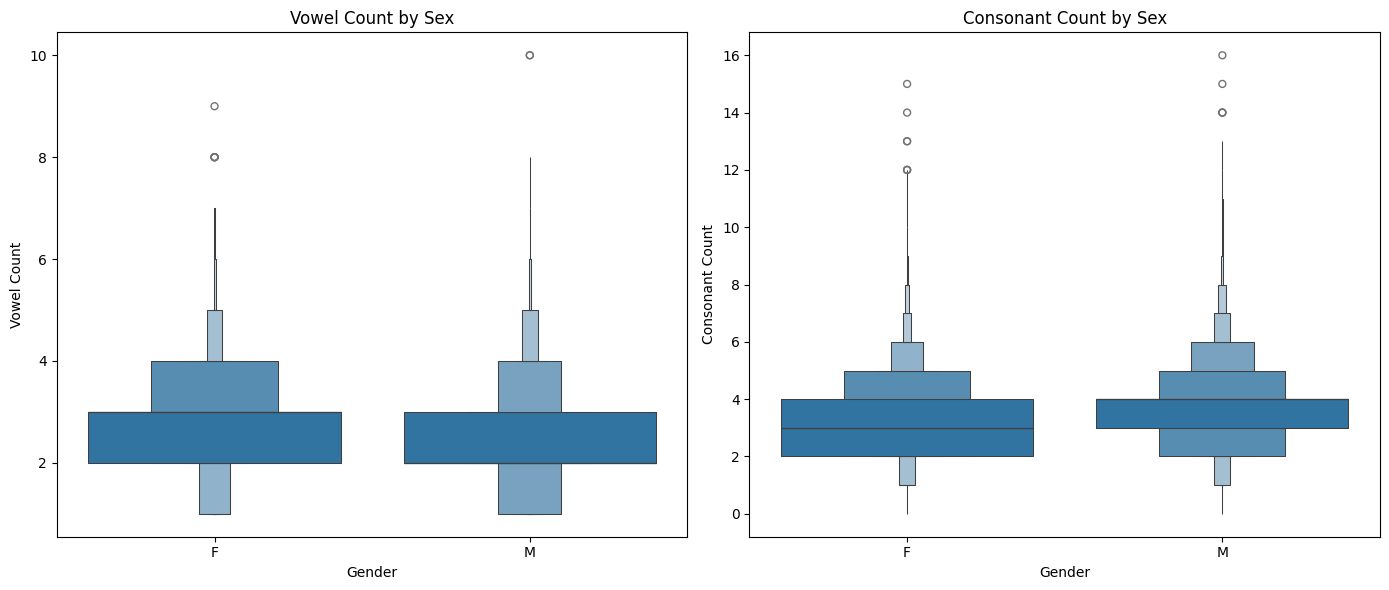

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for vowel count by sex
sns.boxenplot(data=df_char_cleaned, x='Sex', y='vowel_count', ax=axes[0])
axes[0].set_title('Vowel Count by Sex')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Vowel Count')

# Boxplot for consonant count by sex
sns.boxenplot(data=df_char_cleaned, x='Sex', y='consonant_count', ax=axes[1])
axes[1].set_title('Consonant Count by Sex')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Consonant Count')

plt.tight_layout()

In [ ]:
df_length = get_length_stats(df_char_cleaned)

print('Length stats for character names by sex:')
print(df_length)

Length stats for character names by sex:
         mean       std
Sex                    
F    6.060847  1.653263
M    6.078445  1.849723


In [ ]:
df_percent_vowel = get_vowel_percentage(df_char_cleaned)

print('Vowel percentage stats for character names by sex:')
print(df_percent_vowel)

Vowel percentage stats for character names by sex:
         mean       std
Sex                    
F    0.455334  0.107061
M    0.401031  0.107929


In [ ]:
plot_letter_name_percentage(df_char_cleaned, 0)
plot_letter_name_percentage(df_char_cleaned, -1)

In [ ]:
age_sex_percentage, age_labels = get_age_sex_percentage(df_char_cleaned)

top_names = (
    df_char_cleaned.groupby(['age_category', 'Sex'])['Character_name']
    .apply(lambda x: x.value_counts().head(3).index.tolist())
    .unstack(fill_value=[])
)

/Users/luca/Desktop/ada-2024-project-adadasurmonbidet2024/src/utils/results_utils.py:235: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\zacbo\AppData\Local\Temp\ipykernel_19424\1270236452.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
fig = go.Figure()

for sex in ['M', 'F']:
    fig.add_trace(go.Bar(
        x=age_labels,
        y=age_sex_percentage[sex],
        name='Male' if sex == 'M' else 'Female',
        marker_color='skyblue' if sex == 'M' else 'salmon',
        hovertext=[f"Top names: {', '.join(top_names.loc[age, sex])}" for age in age_labels],
        hoverinfo="text"
    ))

fig.update_layout(
    title='Percentage of Males and Females in Each Age Category',
    xaxis_title='Age Category',
    yaxis_title='% of Total Males/Females',
    barmode='group',
    xaxis=dict(tickvals=age_labels, tickangle=0),
    yaxis=dict(ticksuffix='%'),
    legend=dict(title="Gender")
)

fig.show()

## Country Analysis

In [ ]:
countries_code = []

df_continent = create_continent_df(df_char_cleaned,countries_code)
print(df_continent)

       Continent Female_name Male_name
0         Africa      Amina*     Omar*
1           Asia       Priya     Vijay
2         Europe       Marie      John
3  North America       Sarah      John
4        Oceania       Angie      John
5  South America        Dona      João


\* 3 other names are in a tie for this category. We choose to display only one name for readability

In this table we see the most recurrent character names for each continent. For Asia, we see that the most common names are indian names. Is it because other nearby countries are influenced by the bollywood industry or because India's movies are predominent in this dataset? 
We will try to answer the question by plotting the most common character names per country and reting it with the number of movies from this country in the dataset.

In [ ]:
df_top_names = create_top_names_df(df_char_cleaned)
add_movie_count(df_char_cleaned,df_top_names)

TypeError: country_to_continent() missing 1 required positional argument: 'countries_code'

In [46]:
df_top_names = cleaning_non_countries(df_top_names)

In [47]:


fig = go.Figure(go.Scattergeo(
))
fig.add_trace(go.Choropleth(
    locations= df_top_names['primary_country'],
    locationmode='country names',
    showscale= True,
    colorscale='YlOrRd',
    z=np.log10(df_top_names['Number_of_movies']),
    colorbar=dict(title="Number of movies (Log Scale)", tickvals=np.arange(0, 5), ticktext=[f"10^{i}" for i in range(0, 5)]),
    text= [f"Top female name: {female}<br>Top male name: {male}<br>Movies: {movies:,}" 
           for female, male, movies in zip(df_top_names['Female_name'], df_top_names['Male_name'], df_top_names['Number_of_movies'])],
    hovertemplate="%{location}<br>%{text}"
))
fig.update_geos(
    projection_scale=1,center={'lat': 30},
    visible=False,
    showcountries=True, countrycolor="RebeccaPurple"
)
fig.update_layout(
    geo=dict(
        projection_type="mercator",
        lakecolor="aqua"
    ),
    height=500,
    margin={"r":0,"t":5,"l":0,"b":0},
    title_text="Most Common Male and Female Names by Continent"
)
fig.show()